In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [3]:
def run_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  
  for i in range(1,N,1):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    data[i] = x
    
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
  return cumulative_average

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


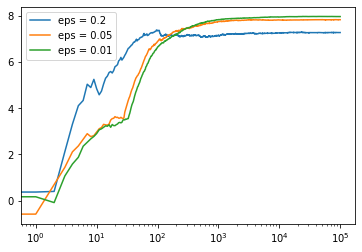

In [4]:
epilson = [0.2,0.05,0.01]

for e in epilson:
    c = run_experiment(1.0, 4.0, 8.0, e, 100000)
    plt.plot(c, label='eps = '+str(e))
    
plt.legend()
plt.xscale('log')
plt.show()

